In [1]:
import torch
from torch import nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from utils import CaptchaDataset2, StackedLSTM, total_chars, get_string_label, plot_sample

from itertools import groupby
BLANK_LABEL = total_chars

In [2]:
test_dataset = CaptchaDataset2('../data/original')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
hidden_size = 1024
net = StackedLSTM(hidden_size=hidden_size).to(device)
net.load_state_dict(torch.load('models/v2_26.pt'))
net.eval()

StackedLSTM(
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=1024, out_features=37, bias=True)
  (lstm): LSTM(30, 1024, num_layers=3)
)

In [3]:
def inference(a):
    a = a.unsqueeze(0).to(device)
    batch_size, channels, height, width = a.shape
    a = (a
              .permute(3, 0, 2, 1)
              .contiguous()
              .view((width, batch_size, -1)))

    h = net.init_hidden(1)
    out, _ = net.forward(a, h)
    prob, max_index = torch.max(out, dim=2)
    raw_pred = list(max_index[:, 0].cpu().numpy())
    pred = [c for c, _ in groupby(raw_pred) if c != BLANK_LABEL]
    
    return pred

In [4]:
true_labels = []
pred_labels = []
for data, true_label in test_dataset:
    pred = inference(data)
    true_labels.append(get_string_label(true_label))
    pred_labels.append(get_string_label(pred))

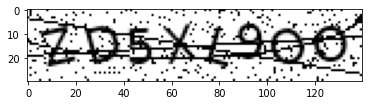

0 CORRECT ZD5XL9OO--->ZD5XL9OO


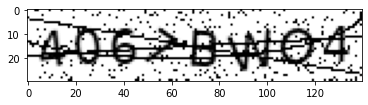

1 CORRECT 4067BWO4--->4067BWO4


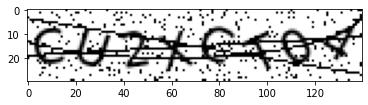

2 CORRECT CU2XCT04--->CU2XCT04


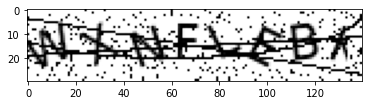

3 CORRECT WXNFLEBI--->WXNFLEBI


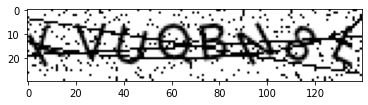

4 WRONG KVUQBN8L--->LVUQBN8L


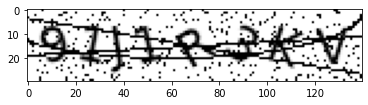

5 WRONG 91J1R3KV--->91I1R3KV


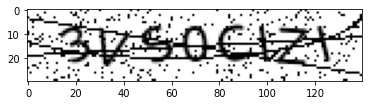

6 CORRECT 3VS0CIZI--->3VS0CIZI


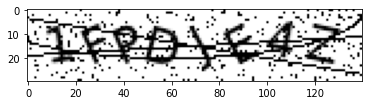

7 WRONG 1FPDJE4Z--->1FPDIE4Z


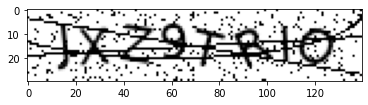

8 CORRECT JXZ9TRIO--->JXZ9TRIO


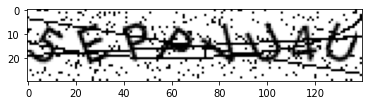

9 CORRECT 5EPPVU4U--->5EPPVU4U


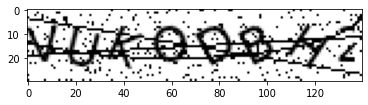

10 WRONG VUKODBH2--->VUKODBHL


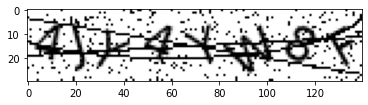

11 WRONG 4JY4YW8F--->4IY4YW8F


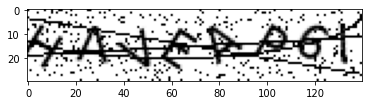

12 CORRECT HAVEAP6I--->HAVEAP6I


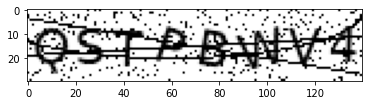

13 WRONG QSTPBWV4--->OSTP8WV4


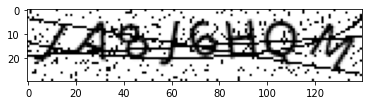

14 WRONG JA8J6HQM--->JA8J6HOAN


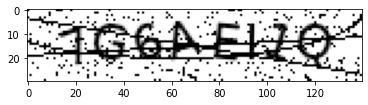

15 WRONG 7G6AEI1Q--->7G6AEI1O


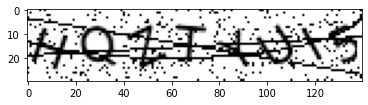

16 WRONG HQZTYUIS--->HOZTYUI5


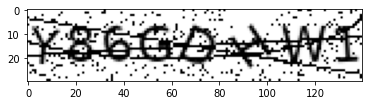

17 CORRECT Y86GDHW1--->Y86GDHW1


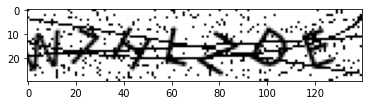

18 WRONG W7HLZDE--->H7HLZDE


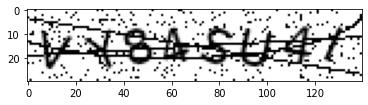

19 CORRECT VY84SU4I--->VY84SU4I


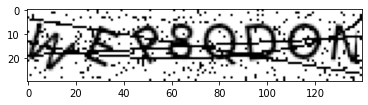

20 WRONG WEP8QDON--->WEP8ODON


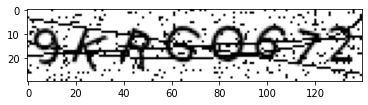

21 CORRECT 9KRGO672--->9KRGO672


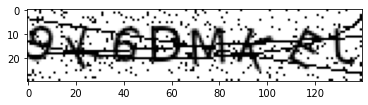

22 WRONG 9K6DMKEL--->9K6DIMKEL


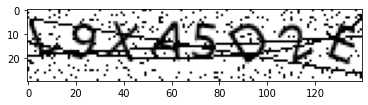

23 CORRECT L9XA5D2E--->L9XA5D2E


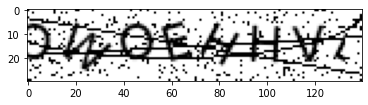

24 WRONG DWOEHHVL--->7WOEHHVI


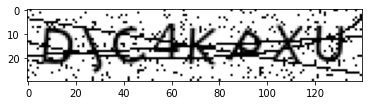

25 CORRECT DJC4KPXU--->DJC4KPXU


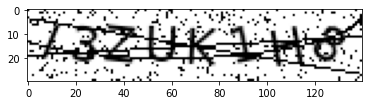

26 CORRECT I3ZUK1H8--->I3ZUK1H8


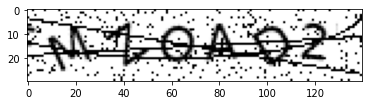

27 WRONG MZOAD2--->NZOAD2


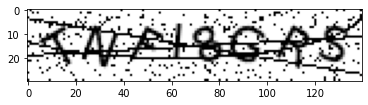

28 CORRECT TNFI8GRS--->TNFI8GRS


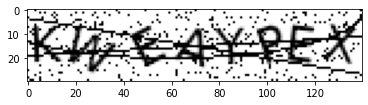

29 CORRECT KWEAYPEX--->KWEAYPEX


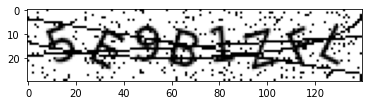

30 CORRECT 5E9B1ZFL--->5E9B1ZFL


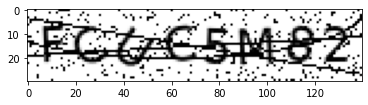

31 WRONG FCUC5M82--->FCUC582


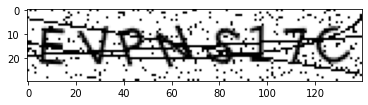

32 CORRECT EVPNS17C--->EVPNS17C


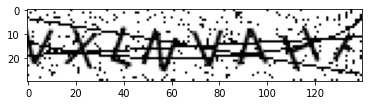

33 WRONG VXLNVAHI--->JXLNVAHI


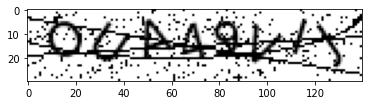

34 WRONG OUA49VIJ--->OUA49VII


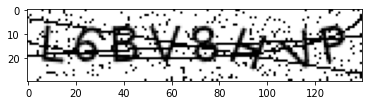

35 CORRECT L6BV8HVP--->L6BV8HVP


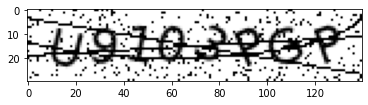

36 CORRECT U9103PGP--->U9103PGP


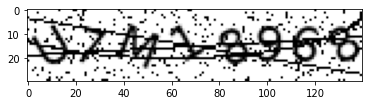

37 WRONG U7M18968--->U7418968


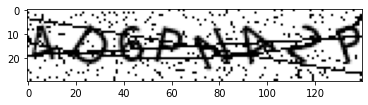

38 CORRECT 4D6PNA2P--->4D6PNA2P


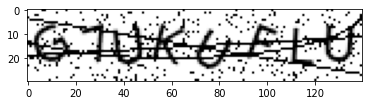

39 CORRECT G7UKUFLU--->G7UKUFLU


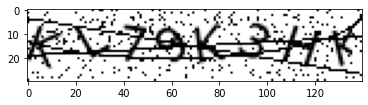

40 CORRECT KL79K3HK--->KL79K3HK


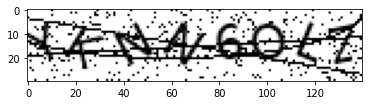

41 CORRECT YKNN6OLZ--->YKNN6OLZ


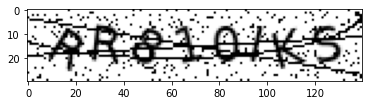

42 CORRECT RR810IKS--->RR810IKS


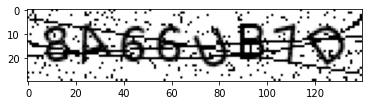

43 WRONG 8A66UB1D--->8A66UB7D


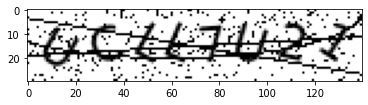

44 CORRECT UCLL7U21--->UCLL7U21


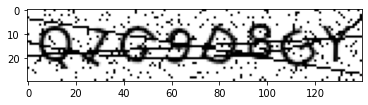

45 CORRECT Q1G9D8GY--->Q1G9D8GY


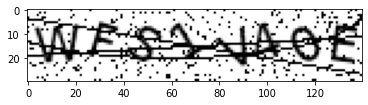

46 CORRECT WFS1V40E--->WFS1V40E


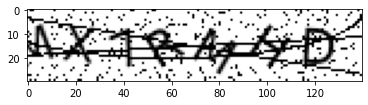

47 WRONG MX1RMHD--->4X7R4HD


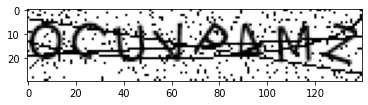

48 WRONG OCUVP4MZ--->OCUVP4I42


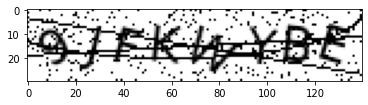

49 WRONG 9JFKWYBE--->9IFKWYBE


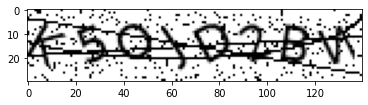

50 WRONG K5OJD2BW--->K5OID2BW


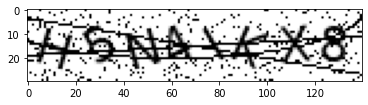

51 CORRECT H5N4IKX8--->H5N4IKX8


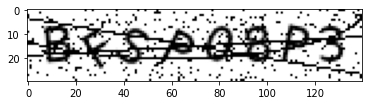

52 CORRECT BFSP08P3--->BFSP08P3


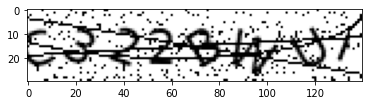

53 WRONG C322BWU--->S322BWUI


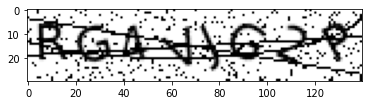

54 WRONG RG4VJG2P--->RG4VIG2P


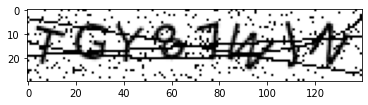

55 CORRECT TGY87WJN--->TGY87WJN


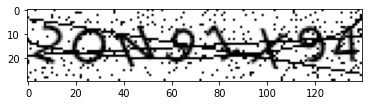

56 CORRECT 2ON91X94--->2ON91X94


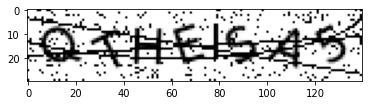

57 CORRECT QTHEISA5--->QTHEISA5


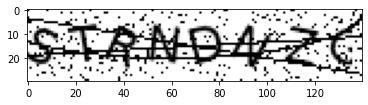

58 CORRECT STRNDNZC--->STRNDNZC


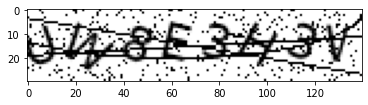

59 CORRECT UW8E3H3V--->UW8E3H3V


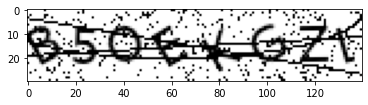

60 WRONG B5OEKGZI--->85OEKGZI


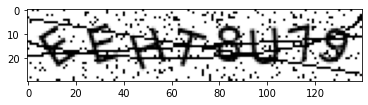

61 CORRECT EEHT8U79--->EEHT8U79


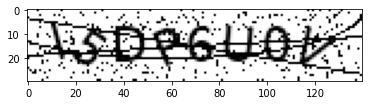

62 CORRECT I5DP6U0V--->I5DP6U0V


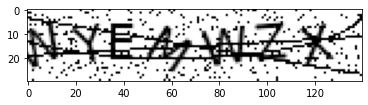

63 WRONG WYEMWZX--->NYEAWZXM


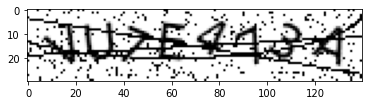

64 CORRECT VU7E473A--->VU7E473A


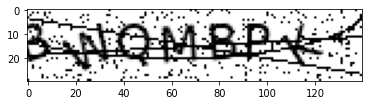

65 WRONG BWQMBPK--->3WQ44BPK


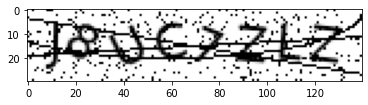

66 CORRECT J8UC7ZLZ--->J8UC7ZLZ


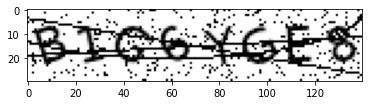

67 CORRECT B1G6YGE8--->B1G6YGE8


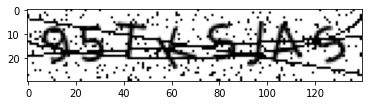

68 WRONG 95TKSJAS--->95TXSJAS


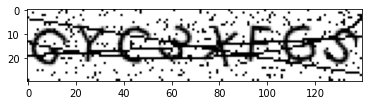

69 CORRECT GYC3XFGS--->GYC3XFGS


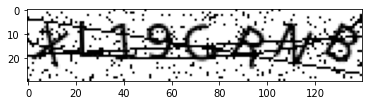

70 WRONG XL19GRNB--->XL19CRNB


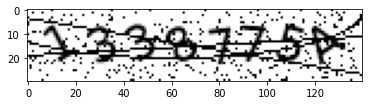

71 CORRECT 1338775A--->1338775A


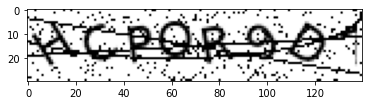

72 WRONG HCPOR9D--->HCPOR9DW


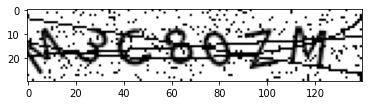

73 WRONG M3C80ZM--->A3C80ZII


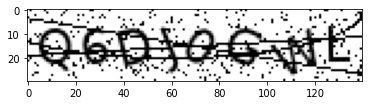

74 WRONG Q6DJ0GW--->Q6DI0GWL


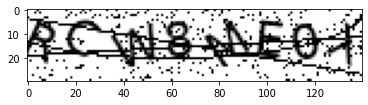

75 WRONG RCW8ME0I--->RCW8HE0X


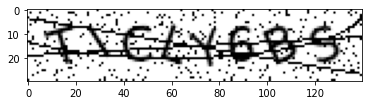

76 WRONG TICLYLBS--->TICLY6BS


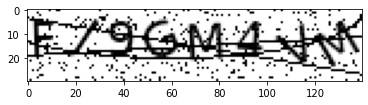

77 WRONG FJ9GM4VM--->FJ9G4VH


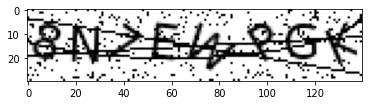

78 CORRECT 8N7EWPGK--->8N7EWPGK


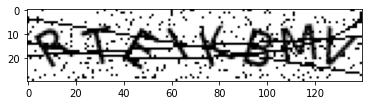

79 WRONG RTEIKBMV--->RTEIKBI4V


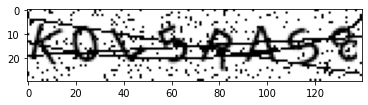

80 WRONG KOL5RAS8--->K0LSRAS8


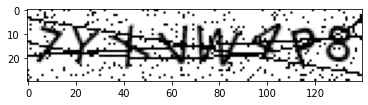

81 CORRECT 7YXVW4P8--->7YXVW4P8


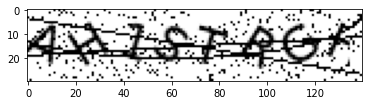

82 CORRECT AH1STRGI--->AH1STRGI


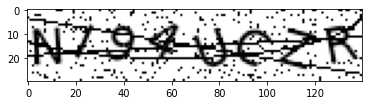

83 CORRECT NI94UCZR--->NI94UCZR


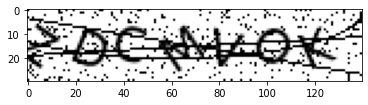

84 WRONG ZDCMVOK--->ZDCWVOK


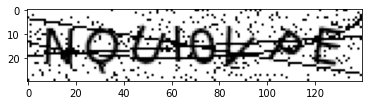

85 WRONG NQUI0VPE--->NOUI0VPE


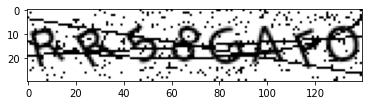

86 CORRECT RR58GAFO--->RR58GAFO


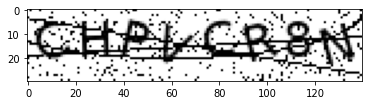

87 CORRECT CHPVCR8N--->CHPVCR8N


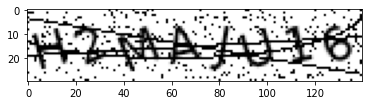

88 WRONG H2MAJU16--->H2NAIU16


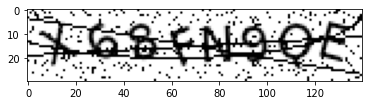

89 WRONG X68FN9QE--->X68FN9OE


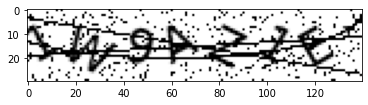

90 WRONG IW9AZ1E--->LW9AZ1E


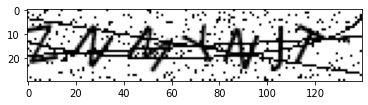

91 WRONG ZNMYNJT--->ZNAYNJT


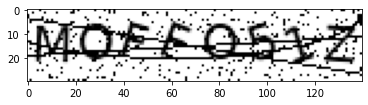

92 CORRECT MOFFO51Z--->MOFFO51Z


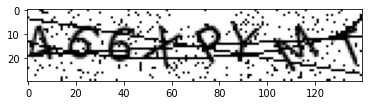

93 WRONG 466XPYMT--->466XPYWT


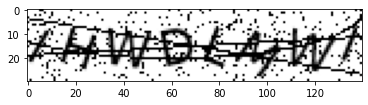

94 WRONG IHWDLMWI--->IHWDLAWI


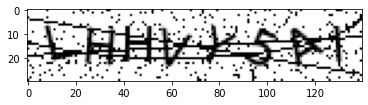

95 CORRECT LHHVY5AI--->LHHVY5AI


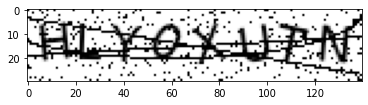

96 CORRECT HLY0XUTN--->HLY0XUTN


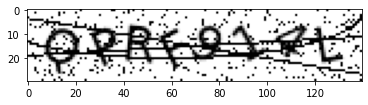

97 WRONG QPRF914L--->OPRF914L


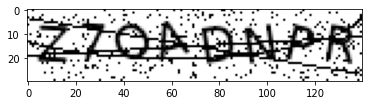

98 CORRECT Z7OADNPR--->Z7OADNPR


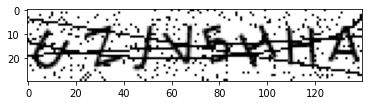

99 CORRECT UZJV5HHA--->UZJV5HHA


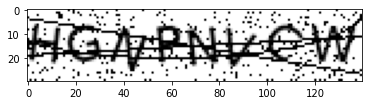

100 CORRECT HGNPNVCW--->HGNPNVCW


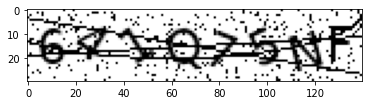

101 WRONG 641Q75NF--->641Q7SNF


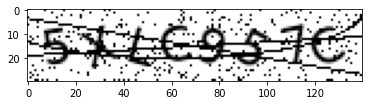

102 CORRECT 5XLC957C--->5XLC957C


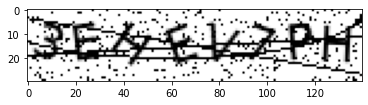

103 CORRECT 3EHEV7PH--->3EHEV7PH


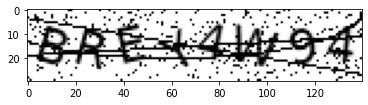

104 CORRECT BREY4W94--->BREY4W94


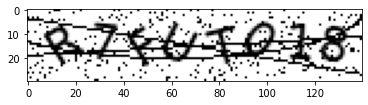

105 CORRECT R7FUT018--->R7FUT018


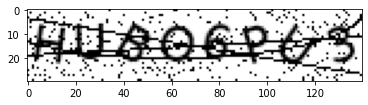

106 WRONG HUBO6PU3--->HUBO6PUS


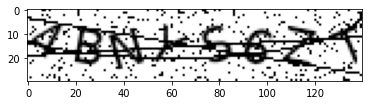

107 WRONG 4BNY56ZT--->4BNYS6ZT


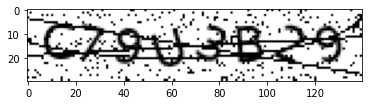

108 CORRECT C79U3B29--->C79U3B29


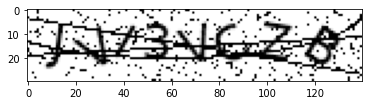

109 CORRECT JVI3VCZB--->JVI3VCZB


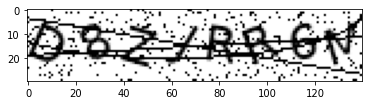

110 WRONG D87JRRGN--->D8ZJRR6V


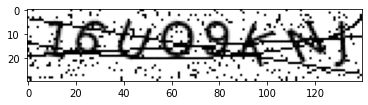

111 WRONG 16UO9KNJ--->16UO9KNI


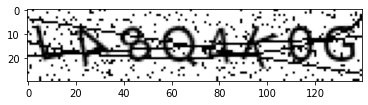

112 CORRECT LA8Q4K0G--->LA8Q4K0G


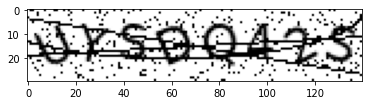

113 CORRECT UYSDQ42S--->UYSDQ42S


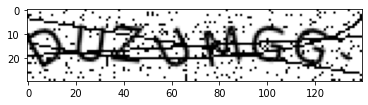

114 WRONG DUZUMGG--->DUZUHGG


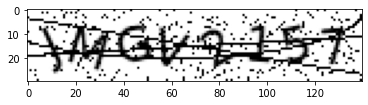

115 WRONG JMGV2157--->IHGV2157


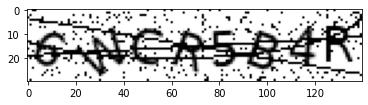

116 CORRECT 6WCR5B4R--->6WCR5B4R


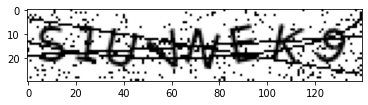

117 CORRECT S1UVNEK9--->S1UVNEK9


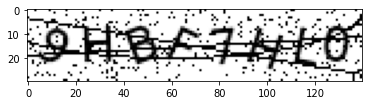

118 CORRECT 9HBF7HL0--->9HBF7HL0


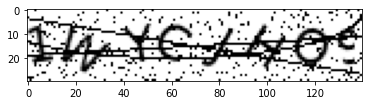

119 WRONG 1WYCJHO9--->1WYCJHOS


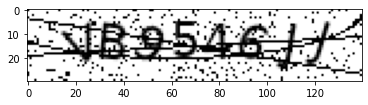

120 CORRECT VB9546JJ--->VB9546JJ


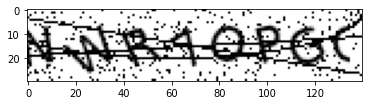

121 WRONG NWR7OPGC--->VWR7OPGC


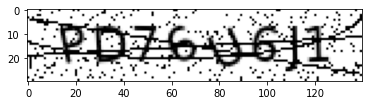

122 CORRECT PD76U6J1--->PD76U6J1


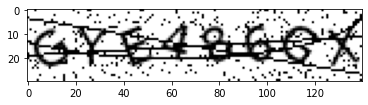

123 WRONG GYE4B6GX--->GYE486GX


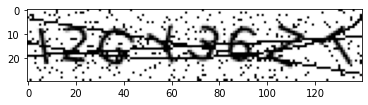

124 CORRECT I2GY36ZT--->I2GY36ZT


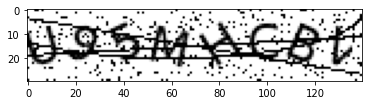

125 CORRECT U95MHCBV--->U95MHCBV


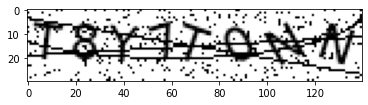

126 CORRECT T8Y7T0NN--->T8Y7T0NN


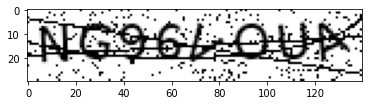

127 CORRECT NG96VOUA--->NG96VOUA


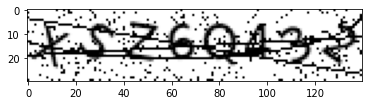

128 WRONG XSZ6Q432--->XSZ6O432


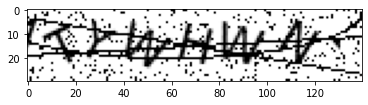

129 WRONG TYWHWN--->TYWHWNX


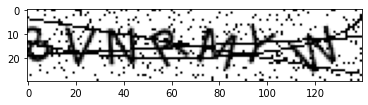

130 WRONG 8VNRMYW--->SVNRIYWW


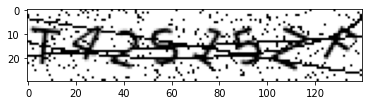

131 CORRECT T42S15ZF--->T42S15ZF


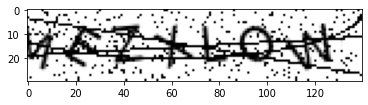

132 WRONG MEZXLOW--->XEZXLOW


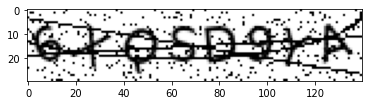

133 WRONG 6XQSD9YA--->6XOSD9YA


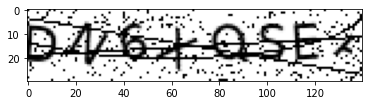

134 WRONG DN6XQSE--->ON6XQSEI


In [5]:
total_correct = 0
for i, (x,y) in enumerate(zip(true_labels, pred_labels)):
    plot_sample(test_dataset[i][0])
    if x==y:
        print(f'{i} CORRECT {x}--->{y}')
        total_correct+=1
    else:
        print(f'{i} WRONG {x}--->{y}')

In [6]:
total_correct/len(test_dataset)

0.5333333333333333